In [3]:
from google.colab import files
uploaded = files.upload()
%ls

Saving train.json to train (1).json
 sample_data/  'train (1).json'   train.json


In [4]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import json

train_file_name = 'train.json'
test_file_name = 'test.json'

complete_training_data = None

try:
    with open(train_file_name, 'r') as file:
        complete_training_data = json.load(file)

    print(type(complete_training_data))
    for obj in complete_training_data[:5]:
      print(obj['document'])
      print(obj['labels'])
      print(obj['tokens'])
    # access info by doing obj['document'/'full_text'/'labels'/'trailing_whitespace'/tokens']
except FileNotFoundError:
    print(f"The file {train_file_name} was not found.")
except json.JSONDecodeError:
    print(f"Error decoding JSON in {train_file_name}.")

<class 'list'>
7
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [6]:
from sklearn.model_selection import train_test_split

# split the data into 80% training and 20% testing sets
train_data, test_data = train_test_split(complete_training_data, test_size=0.2, random_state=42)

In [7]:
# separating data into essays with pii data and without pii data
print(len(train_data))

contains_pii_essays = list(filter(lambda essay_obj: any(label != "O" for label in essay_obj['labels']), train_data))
no_pii_essays = list(filter(lambda essay_obj: all(label == "O" for label in essay_obj['labels']), train_data))

print(len(contains_pii_essays), " + ", len(no_pii_essays) , " = ", len(contains_pii_essays) + len(no_pii_essays))

5445
732  +  4713  =  5445


In [8]:
# number of essays you want to randomly select from no_pii_essays
num_to_select = len(contains_pii_essays) // 19

# randomly select essays withouto pii
randomly_selected_no_pii_essays = np.random.choice(no_pii_essays, num_to_select, replace=False)

# Concatenate the two lists to get the final dataset
final_dataset = contains_pii_essays + list(randomly_selected_no_pii_essays)

# Verify the total number of essays in the final dataset
print(num_to_select)
print(len(final_dataset))
for obj in final_dataset[:5]:
  print(obj['document'])
  print(obj['labels'])
  print(obj['tokens'])

38
770
3565
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ID_NUM', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ID_NUM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [9]:
import spacy
#spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [10]:
def drop_labels_o_with_probability(essay, probability=0.98):
    # randomly drop rows with 'O' labels based on the specified probability
    should_drop = np.random.rand(len(essay['labels'])) < probability

    index = []
    filtered_tokens = []
    filtered_labels = []
    filtered_whitespace = []

    for i, (token, label, drop_flag, whitespace) in enumerate(zip(essay['tokens'], essay['labels'], should_drop, essay['trailing_whitespace'])):
        if token == "\xa0":
          continue
        if label != 'O':
          index.append(i)
          filtered_tokens.append(token)
          filtered_labels.append(label)
          filtered_whitespace.append(whitespace)
          continue
        if not drop_flag:
          index.append(i)
          filtered_tokens.append(token)
          filtered_labels.append(label)
          filtered_whitespace.append(whitespace)
          continue

    cleaned_input = np.column_stack((
        np.full(len(filtered_tokens), essay['document']),
        index,
        np.array(filtered_whitespace, dtype=int),
        filtered_tokens,
        filtered_labels
    ))

    return cleaned_input

official_dataset = []
for essay in final_dataset:
  cleaned_essay = drop_labels_o_with_probability(essay)
  official_dataset.append(cleaned_essay)

official_dataset_flat = np.vstack(official_dataset)
print(official_dataset_flat)
print(official_dataset_flat.shape)

[['3565' '12' '1' 'Daniele' 'B-NAME_STUDENT']
 ['3565' '13' '0' 'Saponara' 'I-NAME_STUDENT']
 ['3565' '17' '1' ':' 'O']
 ...
 ['20938' '876' '1' 'learned' 'O']
 ['20938' '878' '1' 'by' 'O']
 ['20938' '958' '1' 'convince' 'O']]
(15069, 5)


In [11]:
# one hot encode label
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

pii_number_encoding = {
    'B-EMAIL': 0,
    'B-ID_NUM': 1,
    'B-NAME_STUDENT': 2,
    'B-PHONE_NUM': 3,
    'B-STREET_ADDRESS': 4,
    'B-URL_PERSONAL': 5,
    'B-USERNAME': 6,
    'I-NAME_STUDENT': 7,
    'I-PHONE_NUM': 8,
    'I-STREET_ADDRESS': 9,
    'I-URL_PERSONAL': 10,
    'O': 11,
    'I-ID_NUM': 12
}

labels = official_dataset_flat[:, -1]
# numeric_labels = label_encoder.fit_transform(labels)
numeric_labels = [pii_number_encoding[label] for label in labels]

print(numeric_labels)
print(len(numeric_labels))

[2, 7, 11, 2, 7, 1, 1, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 2, 7, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 2, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1

In [12]:
def vectorize_word(word):
    doc = nlp(str(word))
    return doc.vector

new_rows = []

for i, row in enumerate(official_dataset_flat):
    token = row[3]
    word_vector = vectorize_word(token).flatten()
    new_row = np.concatenate((row[:3], word_vector))
    new_rows.append(new_row)

processed_data = np.array(new_rows)

print(processed_data)

[['3565' '12' '1' ... '0.54834247' '0.70009017' '0.71520567']
 ['3565' '13' '0' ... '0.041852772' '-0.73001534' '0.5640285']
 ['3565' '17' '1' ... '-0.13206097' '-1.4771494' '0.042639196']
 ...
 ['20938' '876' '1' ... '0.82750607' '0.52056915' '1.008309']
 ['20938' '878' '1' ... '0.10302067' '-0.54016125' '0.13458586']
 ['20938' '958' '1' ... '1.2270116' '0.16795662' '0.51777303']]


In [13]:
import torch.nn as nn
import torch.nn.functional as F

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, bidirectional=False):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[-1])
        # probabilities = F.softmax(output, dim=0)
        return output


In [14]:
processed_data_float = processed_data.astype(float)

In [15]:
import torch
import torch.optim as optim

input_size = 300  # word embeddings size? maybe this should be more
hidden_size = 128
output_size = 13  # number of classes
num_epochs = 10
learning_rate = 0.001

# initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for i, row in enumerate(processed_data_float):
      input_tensor = torch.tensor(row[1:], dtype=torch.float32, requires_grad = True)
      input_tensor = input_tensor.unsqueeze(0)  #add batch dimension

      # print(input_tensor.shape)
      # print(numeric_labels)

      optimizer.zero_grad()

      # Forward pass
      output = model(input_tensor)

      # Compute the loss
      # print(output.shape)
      # print(output)
      # print(numeric_labels[i])
      predicted_class = torch.tensor(torch.argmax(output).item(), dtype = torch.long)
      target = torch.tensor([numeric_labels[i]], dtype = torch.long)
      # loss = nn.MSELoss()(predicted_class.float(), target.float())
      loss = criterion(output, target.squeeze(0))
      # print(predicted_class, target)

      # backward pass and optimization
      loss.backward()
      optimizer.step()

      if (i + 1) % 1000 == 0:
          print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, len(processed_data_float), loss.item()))


Epoch [1/10], Step [1000/15069], Loss: 0.6397
Epoch [1/10], Step [2000/15069], Loss: 0.0383
Epoch [1/10], Step [3000/15069], Loss: 0.0670
Epoch [1/10], Step [4000/15069], Loss: 0.1907
Epoch [1/10], Step [5000/15069], Loss: 0.0407
Epoch [1/10], Step [6000/15069], Loss: 0.0972
Epoch [1/10], Step [7000/15069], Loss: 0.0409
Epoch [1/10], Step [8000/15069], Loss: 0.1743
Epoch [1/10], Step [9000/15069], Loss: 0.3542
Epoch [1/10], Step [10000/15069], Loss: 0.0065
Epoch [1/10], Step [11000/15069], Loss: 0.0190
Epoch [1/10], Step [12000/15069], Loss: 0.0049
Epoch [1/10], Step [13000/15069], Loss: 0.0203
Epoch [1/10], Step [14000/15069], Loss: 0.0090
Epoch [1/10], Step [15000/15069], Loss: 0.0007
Epoch [2/10], Step [1000/15069], Loss: 0.1448
Epoch [2/10], Step [2000/15069], Loss: 0.1535
Epoch [2/10], Step [3000/15069], Loss: 0.0049
Epoch [2/10], Step [4000/15069], Loss: 0.0084
Epoch [2/10], Step [5000/15069], Loss: 0.0100
Epoch [2/10], Step [6000/15069], Loss: 0.0055
Epoch [2/10], Step [7000/150

In [25]:
test_contains_pii_essays = list(filter(lambda essay_obj: any(label != "O" for label in essay_obj['labels']), test_data))
test_no_pii_essays = list(filter(lambda essay_obj: all(label == "O" for label in essay_obj['labels']), test_data))
test_num_to_select = len(test_contains_pii_essays) // 19

print(len(test_contains_pii_essays), len(test_no_pii_essays))

# randomly select essays withouto pii
test_randomly_selected_no_pii_essays = np.random.choice(test_no_pii_essays, test_num_to_select, replace=False)

# Concatenate the two lists to get the final dataset
test_final_dataset = test_contains_pii_essays + list(test_randomly_selected_no_pii_essays)

print(len(test_final_dataset))

test_official_dataset = []
for essay in test_final_dataset:
  cleaned_essay = drop_labels_o_with_probability(essay, 0.9)
  test_official_dataset.append(cleaned_essay)

test_official_dataset_flat = np.vstack(official_dataset)
new_rows = []

for i, row in enumerate(official_dataset_flat):
    token = row[3]
    word_vector = vectorize_word(token).flatten()
    new_row = np.concatenate((row[:3], word_vector))
    new_rows.append(new_row)

test_processed_data = np.array(new_rows)
test_processed_data_float = test_processed_data.astype(float)

test_labels = test_official_dataset_flat[:, -1]
# numeric_labels = label_encoder.fit_transform(labels)
test_numeric_labels = [pii_number_encoding[label] for label in test_labels]

print(len(test_numeric_labels))

213 1149
224
15069


In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Evaluate the model on the validation/test dataset
with torch.no_grad():
    for i, (row, label) in enumerate(zip(test_processed_data_float, test_numeric_labels)):
      input_tensor = torch.tensor(row[1:], dtype=torch.float32, requires_grad = True)
      input_tensor = input_tensor.unsqueeze(0)  # add batch dimension

      # Forward pass
      output = model(input_tensor)

      # Compute predicted class
      s = F.softmax(output, dim=0)
      predicted_class = torch.argmax(s).item()
      # predicted_class = torch.tensor(torch.argmax(output).item(), dtype = torch.long)
      # target = torch.tensor([numeric_labels[i]], dtype = torch.long)

      # Store true and predicted labels
      true_labels.append(label)
      predicted_labels.append(predicted_class)

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Compute other metrics using classification_report
# report = classification_report(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
print("Classification Report:\n", report)


Accuracy: 0.9293251045192116
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.61      0.75        36
           1       0.83      0.59      0.69        68
           2       0.84      0.52      0.64      1102
           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00         1
           5       0.75      0.15      0.24        82
           6       1.00      0.33      0.50         6
           7       0.89      0.57      0.70       852
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

   micro avg       0.86      0.52      0.65      2175
   macro avg       0.52      0.25      0.33      2175
weighted avg       0.85      0.52      0.64      2175



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
full_report = classification_report(true_labels, predicted_labels)
print(full_report)

              precision    recall  f1-score   support

           0       0.96      0.61      0.75        36
           1       0.83      0.59      0.69        68
           2       0.84      0.52      0.64      1102
           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00         1
           5       0.75      0.15      0.24        82
           6       1.00      0.33      0.50         6
           7       0.89      0.57      0.70       852
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         1
          11       0.94      1.00      0.97     12894
          12       0.00      0.00      0.00         1

    accuracy                           0.93     15069
   macro avg       0.55      0.31      0.38     15069
weighted avg       0.92      0.93      0.92     15069



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print("true labels: ", true_labels)
print("predicted labels: ", predicted_labels)

true labels:  [2, 7, 11, 2, 7, 1, 1, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 2, 7, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 2, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11,

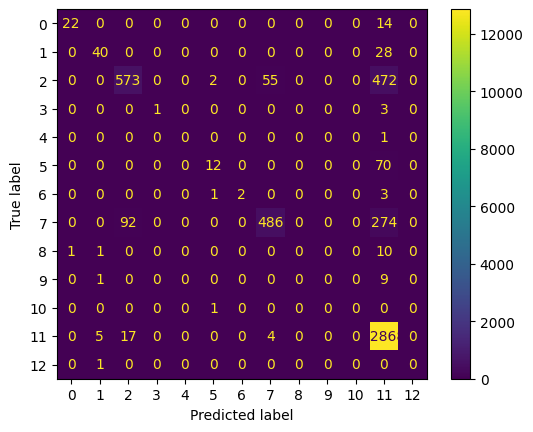

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predicted_labels)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

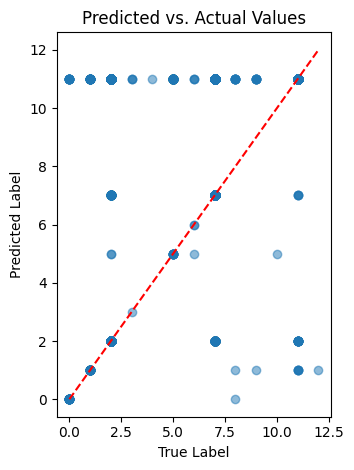

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 2)
plt.scatter(true_labels, predicted_labels, alpha=0.5)
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Values')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

plt.tight_layout()
plt.show()
